# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# importing my df_products_merged_products_grouped as df_new_products
df_new_products = pd.read_pickle(r'C:\Users\Babafemi Olayinka\Jupyter Notebook\FEB-2023 INSTACART BASKET ANALYSIS\Data\Prepared Data\df_orders_merged_products_grouped.pkl')

In [3]:
df_new_products.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,Busiest day,Busiest days,busiest_period_of_day,max_order,loyalty_flag,max_price,average_price,spending_flag,order_freq,order_freq_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Regularly busy,Regular days,Most orders,32,Regular customer,20.0,20.0,High spender,8.0,frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Regularly busy,Regular days,Average orders,32,Regular customer,20.0,20.0,High spender,8.0,frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Busiest day,Busiest days,Average orders,5,New customer,18.5,18.5,High spender,7.0,frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Regularly busy,Slowest days,Most orders,3,New customer,14.0,14.0,High spender,9.0,frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Least busy,Slowest days,Average orders,3,New customer,14.0,14.0,High spender,9.0,frequent customer


<AxesSubplot:>

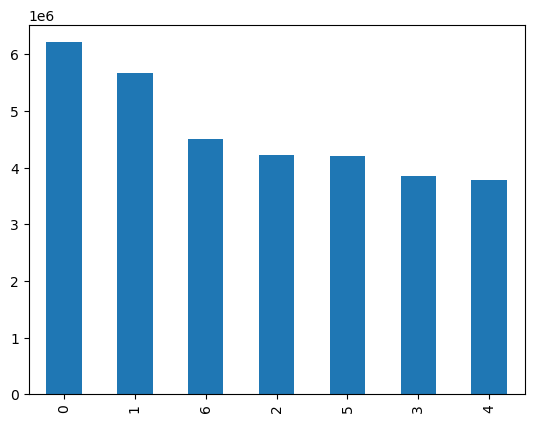

In [5]:
# creating a bar chart from number of total orders in the order_dow column, sorting it from hihgest to smallest
df_new_products['order_dow'].value_counts().plot.bar()

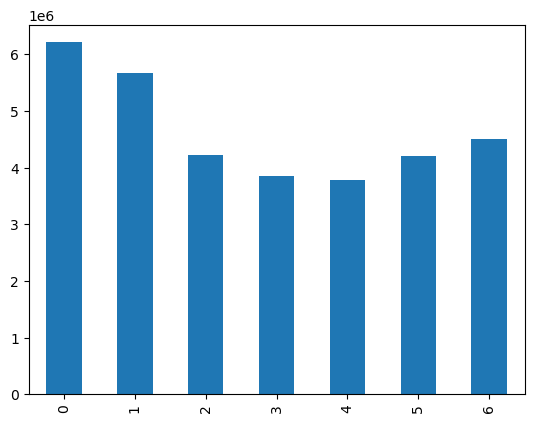

In [6]:
# creating a bar chart from number of total orders in the order_dow column, sorting it with the index axis
bar = df_new_products['order_dow'].value_counts().sort_index().plot.bar()

## The sort_index() function will sort the bars in your chart according to their index order (rather than largest to smallest)
same result can be seen by counting the frequency and ordering it by the index_col using : df_new_products['order_dow'].value_counts().sort_index()

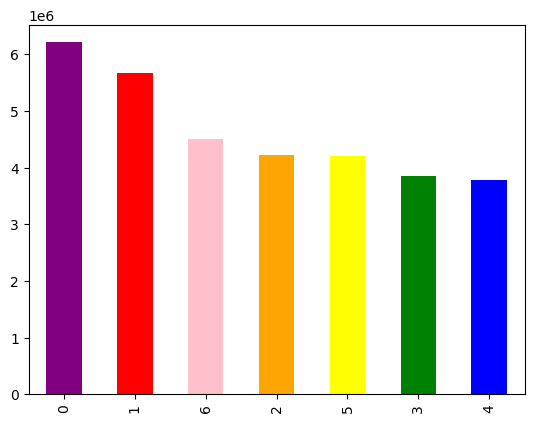

In [9]:
# Using colors for your bar plot
bar = df_new_products['order_dow'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# Exporting my Bar Chart Only

In [10]:
path = r'C:\Users\Babafemi Olayinka\Jupyter Notebook\FEB-2023 INSTACART BASKET ANALYSIS'

In [11]:
path

'C:\\Users\\Babafemi Olayinka\\Jupyter Notebook\\FEB-2023 INSTACART BASKET ANALYSIS'

In [12]:
bar.figure.savefig(os.path.join(path, 'Analysis','Visuals', 'bar_orders_dow.png'))

# Creating Histogram and Scatterplots

<AxesSubplot:ylabel='Frequency'>

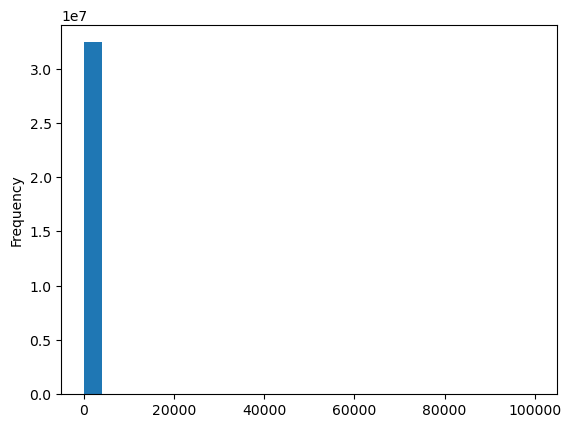

In [13]:
# Plotting histogram. 
df_new_products['prices'].plot.hist(bins = 25)

## Something doesn’t seem right here. You should have gotten 25 bars (one for each bin). Instead, however, you’ve gotten one single column. The reason for this has a lot to do with the data prep stage.

In [14]:
df_new_products['prices'].mean()

11.981143922956724

In [15]:
df_new_products['prices'].median()

7.4

In [16]:
# How could an item cost $99,999.00? This must be the result of data corruption or some kind of special value within the data. This is also what’s breaking your histogram
df_new_products['prices'].max()

99999.0

##. Extreme value of 99,999 is forcing your histogram to shove all the small values into one bar and the extreme value in another one. And this second bar is so tiny that you can’t even see it on the chart. Hence, the one-column histogram you saw above. 
Solution: another way to explore your data is to create a scatterplot. Normally, you’d use scatterplots to investigate the relationship between two variables. However, when conducting an exploratory analysis, you can also use scatterplots to visualize the distribution of data points in order to identify any outliers.


<AxesSubplot:xlabel='prices', ylabel='prices'>

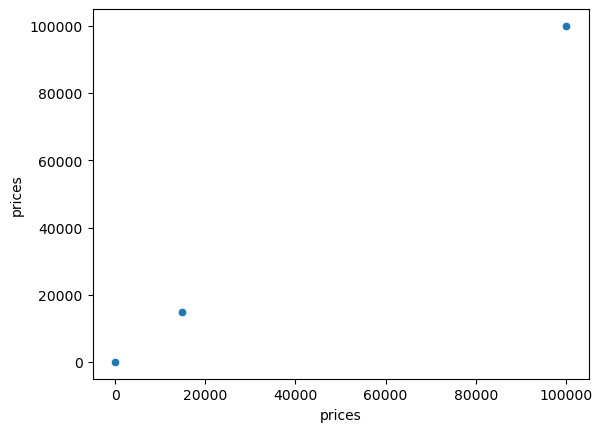

In [17]:
# using scatterplot to view the distrobution of the data sets if it show the outliers. Brcause my mean is 12, i except 
my dataset to be around 12. But i have 2 outliers
sns.scatterplot(x = 'prices', y = 'prices',data = df_new_products)

##. Let’s first determine whether there are any values above a certain threshold in your data, for instance, anything above the “normal” price of a supermarket item. If you imagined the maximum price anyone would pay in a supermarket were around 100 dollar, then anything above that amount could be considered an outlier.There are 5,127 rows with outlier observations (prices greater than 100 dollar, which can be further marked as missing values (Nan), which the outliers will definetly be inside of it.

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
df_new_products = pd.read_pickle(r'C:\Users\Babafemi Olayinka\Jupyter Notebook\FEB-2023 INSTACART BASKET ANALYSIS\Data\Prepared Data\df_orders_merged_products_grouped.pkl')

In [6]:
# creating a subset of my df due to space and i will use this for Histogram and line chart.
df_new_products_sub = df_new_products[:2000000]

In [7]:
# marking any values within my prices column that is greater than 100 as missing values (NaN) for all the first 2Million rows.
df_new_products_sub.loc[df_new_products_sub['prices'] >100, 'prices'] = np.nan

In [8]:
# confirming my max value within the prices column to see if i have successfully remove my outliers.
df_new_products_sub['prices'].max()

24.5

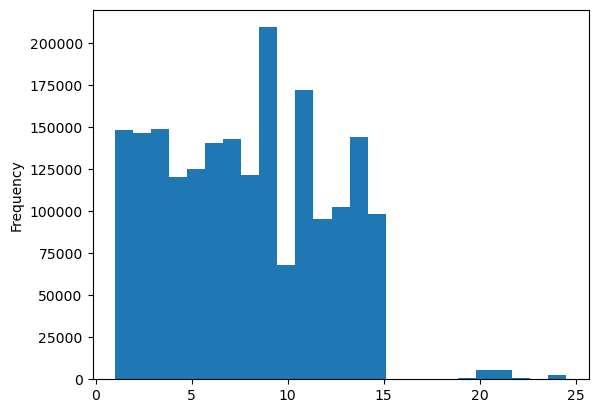

In [9]:
# plotting my histogram, making use of 25 bins
hist = df_new_products_sub['prices'].plot.hist(bins = 25)

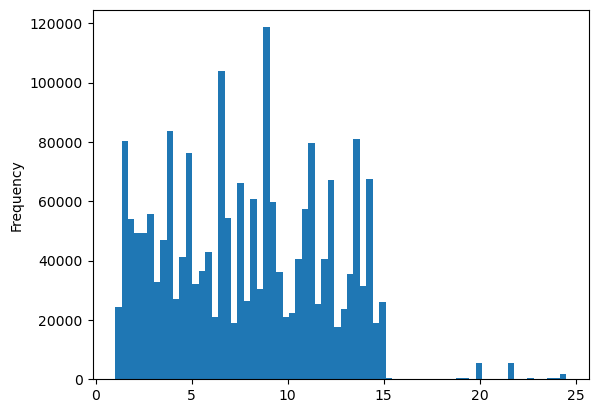

In [10]:
hist = df_new_products_sub['prices'].plot.hist(bins = 70)

# Exporting my histogram

In [11]:
path = r'C:\Users\Babafemi Olayinka\Jupyter Notebook\FEB-2023 INSTACART BASKET ANALYSIS'

In [12]:
path

'C:\\Users\\Babafemi Olayinka\\Jupyter Notebook\\FEB-2023 INSTACART BASKET ANALYSIS'

In [37]:
hist.figure.savefig(os.path.join(path, 'Analysis','Visuals', 'hist_orders_dow.png'))

# Creating Line Chart
This subset df_new_products_sub is just the first 2 Million rows and it wont represent the total population, therefore we need to create a sample, that sample will be selected randomly from the entire dataframe.
 In this case, the value is 0.7, since you want a 70/30 split. Any rows whose assigned number is less than 0.7 are placed in one sample, while any rows whose assigned number is greater than 0.7 are placed in the other, effectively splitting the dataframe into two dataframes at a 70/30 ratiom

In [19]:
# This “seed” represents a random but reproducible pattern
np.random.seed(4)
dev = np.random.rand(len(df_new_products_sub)) <= 0.7

In [16]:
dev

array([False,  True, False, ..., False,  True,  True])

In [20]:
# create a list holding True/False values to the test np.random.rand() <= 0.7 on my subset df df_new_products_sub assuming that is my
entire df due to space
dev = np.random.rand(len(df_new_products_sub)) <= 0.7

In [21]:
# store 70% of the sample in the df big on my subset df df_new_products_sub assuming that is my
entire df due to space
big = df_new_products_sub[dev]

In [22]:
# store 30% of the sample on my subset df df_new_products_sub assuming that is my entire df due to space
small = df_new_products_sub[~dev]

1) Great! Before racing immediately to create your Line chart, however, it’s always good to stop for a moment and check that you’ve achieved the results you expected. That you have the 70% of the df as big and 30% as small.

STEP 2) As one last step before creating that chart, let’s do something that will speed up the processing time even further—reducing your samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.” You can achieve this by running (and checking the result!) of the following command

In [23]:
# checking that the total row as expected is what i have by using fx lens.
len(df_new_products_sub)

2000000

In [24]:
# adding the 70% and 30% to see if they both give me 100%. 
len(big) + len(small)

2000000

In [26]:
# To creates a new dataframe, df_new_products_sub_2, that contains only the “prices” and “order_day_of_week” columns from your small subset.
df_new_products_sub_2 = small[['order_dow','prices']]

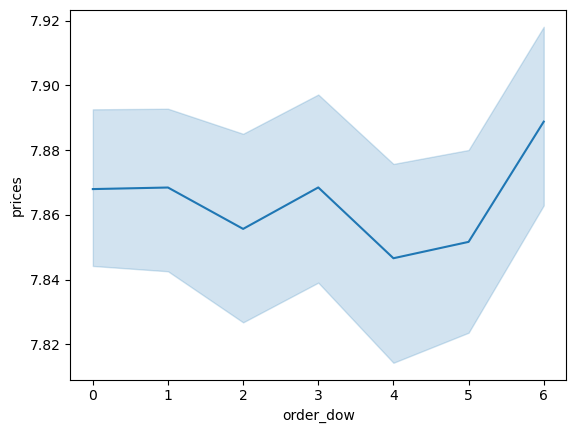

In [27]:
# Creating my line chart with the subset df and using the small sample size to draw a conclusion. Day '0' & '6' has the highest orders of the day.
line = sns.lineplot(data = df_new_products_sub_2, x = 'order_dow',y = 'prices')

In [28]:
# That is the small sample size 30% of 2MLL
len(df_new_products_sub_2)

600197

In [29]:
df_new_products_sub_3 = df_new_products_sub[['order_dow','prices']]

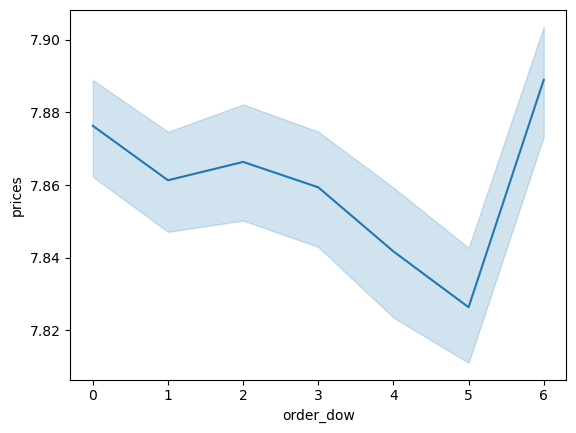

In [30]:
# The line chart of my entire df of the 2ML rows though. Which i have use to compare the line chart of one of the sample size 
used above, the small sample size and it shows true representation of the entire df.
line_2 = sns.lineplot(data = df_new_products_sub_3, x = 'order_dow',y = 'prices')

# Exporting my line chart

In [31]:
path = r'C:\Users\Babafemi Olayinka\Jupyter Notebook\FEB-2023 INSTACART BASKET ANALYSIS'

In [32]:
path

'C:\\Users\\Babafemi Olayinka\\Jupyter Notebook\\FEB-2023 INSTACART BASKET ANALYSIS'

In [35]:
line.figure.savefig(os.path.join(path, 'Analysis','Visuals', 'line_orders_dow.png'))

In [36]:
line_2.figure.savefig(os.path.join(path, 'Analysis','Visuals', 'line_2_orders_dow.png'))